In [2]:
import pandas as pd
import numpy as np
data_divar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/divar_posts_dataset.csv')


In [297]:
data_divar.isnull().sum()

Unnamed: 0              0
archive_by_user         0
brand              756743
cat1                    0
cat2                 1758
cat3               172334
city                    0
created_at              0
desc                    0
id                      0
image_count             0
mileage            827184
platform                0
price                   0
title                   0
type               849106
year               827184
dtype: int64

In [298]:
data_divar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947635 entries, 0 to 947634
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       947635 non-null  int64  
 1   archive_by_user  947635 non-null  bool   
 2   brand            190892 non-null  object 
 3   cat1             947635 non-null  object 
 4   cat2             945877 non-null  object 
 5   cat3             775301 non-null  object 
 6   city             947635 non-null  object 
 7   created_at       947635 non-null  object 
 8   desc             947635 non-null  object 
 9   id               947635 non-null  int64  
 10  image_count      947635 non-null  int64  
 11  mileage          120451 non-null  float64
 12  platform         947635 non-null  object 
 13  price            947635 non-null  int64  
 14  title            947635 non-null  object 
 15  type             98529 non-null   object 
 16  year             120451 non-null  obje

In [299]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Q1:**

In [3]:
pmd = pd.get_dummies(data_divar[['cat1','cat2','cat3','brand']])
pmd.head()


,cat1_businesses,cat1_electronic-devices,cat1_for-the-home,cat1_leisure-hobbies,cat1_personal,cat1_vehicles,cat2_animals,cat2_audio-video,cat2_baby-and-toys,cat2_batch,cat2_bicycle,cat2_book-student-literature,cat2_building-and-garden,cat2_cars,cat2_childrens-clothing-and-shoe,cat2_clothing-and-shoes,cat2_computers,cat2_equipments-and-machinery,cat2_furniture-and-home-decore,cat2_game-consoles-and-video-games,cat2_health-beauty,cat2_hobby-collectibles,cat2_jewelry-and-watches,cat2_leisure-hobbies-toys,cat2_mobile-tablet,cat2_motorcycles,cat2_musical-instruments,cat2_parts-accessories,cat2_phone,cat2_sport-leisure,cat2_travel-packages,cat2_utensils-and-appliances,cat2_utility,cat3_accessories,cat3_antiques-and-art,cat3_ball-sports,cat3_barbershop-and-beautysalon,cat3_bathroom-wc-sauna,cat3_beds-bedroom,cat3_birds,...,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_MSI::ام‌اس‌آی,brand_Motorola::موتورلا,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony Ericsson::سونی اریکسون,brand_Sony::سونی,brand_Suzuki::سوزوکی,brand_Toshiba::توشیبا,brand_ViewSonic::ویوسونیک,brand_ZTE::زدتی‌ای,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,brand_دوو::Daewoo,brand_رانا::Runna,brand_رنو::Renault,brand_زانتیا::Citroen Xantia,brand_سایر,brand_سمند::Samand,brand_غیره,brand_لیفان::Lifan,brand_نیسان::Nissan,brand_هیوندای (غیره)::Hyundai,brand_هیوندای سوناتا::Hyundai Sonata,brand_وانت,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [301]:
data_divarbr=data_divar[['city']]
data_divarbr['city'].unique()

array(['Tehran', 'Mashhad', 'Karaj', 'Qom', 'Isfahan', 'Shiraz', 'Tabriz',
       'Ahvaz', 'Kermanshah'], dtype=object)

In [302]:
new_data = pd.concat([data_divarbr, pmd], axis = 1)
new_data.head()

,city,cat1_businesses,cat1_electronic-devices,cat1_for-the-home,cat1_leisure-hobbies,cat1_personal,cat1_vehicles,cat2_animals,cat2_audio-video,cat2_baby-and-toys,cat2_batch,cat2_bicycle,cat2_book-student-literature,cat2_building-and-garden,cat2_cars,cat2_childrens-clothing-and-shoe,cat2_clothing-and-shoes,cat2_computers,cat2_equipments-and-machinery,cat2_furniture-and-home-decore,cat2_game-consoles-and-video-games,cat2_health-beauty,cat2_hobby-collectibles,cat2_jewelry-and-watches,cat2_leisure-hobbies-toys,cat2_mobile-tablet,cat2_motorcycles,cat2_musical-instruments,cat2_parts-accessories,cat2_phone,cat2_sport-leisure,cat2_travel-packages,cat2_utensils-and-appliances,cat2_utility,cat3_accessories,cat3_antiques-and-art,cat3_ball-sports,cat3_barbershop-and-beautysalon,cat3_bathroom-wc-sauna,cat3_beds-bedroom,...,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_MSI::ام‌اس‌آی,brand_Motorola::موتورلا,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony Ericsson::سونی اریکسون,brand_Sony::سونی,brand_Suzuki::سوزوکی,brand_Toshiba::توشیبا,brand_ViewSonic::ویوسونیک,brand_ZTE::زدتی‌ای,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,brand_دوو::Daewoo,brand_رانا::Runna,brand_رنو::Renault,brand_زانتیا::Citroen Xantia,brand_سایر,brand_سمند::Samand,brand_غیره,brand_لیفان::Lifan,brand_نیسان::Nissan,brand_هیوندای (غیره)::Hyundai,brand_هیوندای سوناتا::Hyundai Sonata,brand_وانت,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia
0,Tehran,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mashhad,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mashhad,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Tehran,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Karaj,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [303]:
new_data_sum = new_data.groupby('city').sum()
new_data_sum

,cat1_businesses,cat1_electronic-devices,cat1_for-the-home,cat1_leisure-hobbies,cat1_personal,cat1_vehicles,cat2_animals,cat2_audio-video,cat2_baby-and-toys,cat2_batch,cat2_bicycle,cat2_book-student-literature,cat2_building-and-garden,cat2_cars,cat2_childrens-clothing-and-shoe,cat2_clothing-and-shoes,cat2_computers,cat2_equipments-and-machinery,cat2_furniture-and-home-decore,cat2_game-consoles-and-video-games,cat2_health-beauty,cat2_hobby-collectibles,cat2_jewelry-and-watches,cat2_leisure-hobbies-toys,cat2_mobile-tablet,cat2_motorcycles,cat2_musical-instruments,cat2_parts-accessories,cat2_phone,cat2_sport-leisure,cat2_travel-packages,cat2_utensils-and-appliances,cat2_utility,cat3_accessories,cat3_antiques-and-art,cat3_ball-sports,cat3_barbershop-and-beautysalon,cat3_bathroom-wc-sauna,cat3_beds-bedroom,cat3_birds,...,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_MSI::ام‌اس‌آی,brand_Motorola::موتورلا,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony Ericsson::سونی اریکسون,brand_Sony::سونی,brand_Suzuki::سوزوکی,brand_Toshiba::توشیبا,brand_ViewSonic::ویوسونیک,brand_ZTE::زدتی‌ای,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,brand_دوو::Daewoo,brand_رانا::Runna,brand_رنو::Renault,brand_زانتیا::Citroen Xantia,brand_سایر,brand_سمند::Samand,brand_غیره,brand_لیفان::Lifan,brand_نیسان::Nissan,brand_هیوندای (غیره)::Hyundai,brand_هیوندای سوناتا::Hyundai Sonata,brand_وانت,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ahvaz,2460.0,9411.0,16997.0,3816.0,4802.0,9677.0,2391.0,1100.0,670.0,606.0,990.0,0.0,1839.0,5699.0,0.0,3218.0,1557.0,1854.0,11507.0,1915.0,519.0,0.0,395.0,0.0,4839.0,698.0,0.0,3280.0,0.0,435.0,0.0,3187.0,464.0,0.0,1032.0,0.0,0.0,0.0,1126.0,2391.0,...,524.0,224.0,74.0,0.0,4.0,206.0,1719.0,35.0,200.0,0.0,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373.0,531.0,0.0,0.0,1.0,333.0,0.0,0.0,1599.0,351.0,0.0,571.0,0.0,402.0,718.0,0.0,0.0
Isfahan,5198.0,11703.0,15719.0,8037.0,5199.0,15947.0,6493.0,1862.0,521.0,1003.0,1012.0,0.0,892.0,9940.0,0.0,3644.0,1476.0,4195.0,11097.0,2085.0,623.0,0.0,411.0,0.0,6280.0,1974.0,0.0,4033.0,0.0,532.0,0.0,3248.0,482.0,692.0,1390.0,0.0,0.0,0.0,955.0,5214.0,...,612.0,263.0,162.0,0.0,7.0,372.0,1747.0,83.0,268.0,0.0,0.0,1.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,777.0,813.0,80.0,0.0,373.0,0.0,0.0,344.0,2179.0,610.0,466.0,957.0,0.0,767.0,867.0,620.0,0.0
Karaj,6204.0,14378.0,28208.0,4906.0,11996.0,18044.0,3308.0,2841.0,2157.0,862.0,918.0,0.0,1461.0,11541.0,921.0,7359.0,2556.0,5342.0,20359.0,2459.0,866.0,0.0,693.0,0.0,6522.0,951.0,0.0,5552.0,0.0,680.0,0.0,5644.0,744.0,619.0,2449.0,0.0,447.0,0.0,1547.0,2267.0,...,718.0,219.0,258.0,12.0,11.0,340.0,1862.0,97.0,508.0,0.0,11.0,2.0,120.0,366.0,0.0,0.0,0.0,0.0,380.0,0.0,0.0,0.0,0.0,718.0,919.0,82.0,0.0,381.0,0.0,0.0,508.0,3241.0,641.0,516.0,604.0,0.0,1028.0,1184.0,571.0,0.0
Kermanshah,1587.0,4557.0,5963.0,779.0,4077.0,6167.0,779.0,496.0,0.0,372.0,0.0,0.0,0.0,3003.0,422.0,3655.0,0.0,1215.0,5323.0,1105.0,0.0,0.0,0.0,0.0,2956.0,378.0,0.0,2786.0,0.0,0.0,0.0,640.0,0.0,0.0,768.0,0.0,0.0,0.0,395.0,779.0,...,348.0,107.0,71.0,0.0,9.0,281.0,1039.0,47.0,223.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,362.0,0.0,0.0,0.0,0.0,0.0,0.0,961.0,0.0,0.0,457.0,0.0,0.0,497.0,0.0,0.0
Mashhad,8097.0,23199.0,40845.0,16177.0,24662.0,25899.0,12247.0,3761.0,2971.0,1346.0,1860.0,801.0,3563.0,16014.0,3155.0,16130.0,3921.0,6751.0,27146.0,3484.0,1083.0,398.0,1323.0,0.0,11686.0,2330.0,0.0,7555.0,0.0,871.0,0.0,8877.0,1259.0,1045.0,4212.0,0.0,502.0,0.0,2152.0,10006.0,...,1456.0,532.0,479.0,17.0,37.0,553.0,3402.0,168.0,816.0,0.0,15.0,2.0,357.0,729.0,0.0,0.0,373.0,0.0,478.0,0.0,0.0,0.0,0.0,1198.0,116

In [305]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema

# **Elbow method**: It is used to determine the optimal value of K to perform the K-Means Clustering Algorithm.

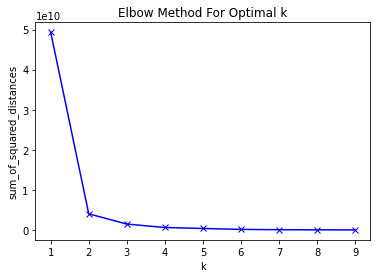

In [306]:

sum_of_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=100, n_init=50)
    km = km.fit(new_data_sum)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


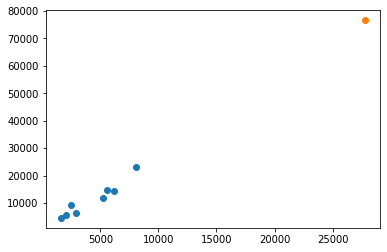

In [307]:
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from matplotlib import pyplot

model = KMeans(n_clusters=2)
model.fit(new_data_sum)
yhat = model.predict(new_data_sum)
clusters = unique(yhat)
X=np.array(new_data_sum)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

In [308]:
labels=model.labels_

new_data_sum['cluster'] = labels
new_data_sum['cluster']

city
Ahvaz         0
Isfahan       0
Karaj         0
Kermanshah    0
Mashhad       0
Qom           0
Shiraz        0
Tabriz        0
Tehran        1
Name: cluster, dtype: int32

**Cities with close geographical coordinates are in the same cluster!** (exeption=mashhad)

# Affinity Propagation:


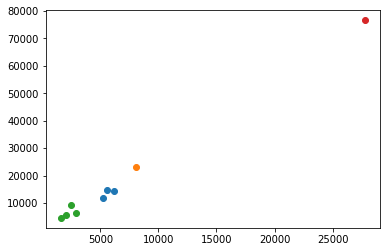

In [312]:
from sklearn.cluster import AffinityPropagation
from numpy import unique
from numpy import where
from matplotlib import pyplot

model00 = AffinityPropagation(damping=0.7)
model00.fit(new_data_sum)
yhat = model00.predict(new_data_sum)
clusters = unique(yhat)
X=np.array(new_data_sum)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

In [313]:
labels=model00.labels_

new_data_sum['clusterAffinityPropagation'] = labels
new_data_sum['clusterAffinityPropagation']

city
Ahvaz         2
Isfahan       0
Karaj         0
Kermanshah    2
Mashhad       1
Qom           2
Shiraz        0
Tabriz        2
Tehran        3
Name: clusterAffinityPropagation, dtype: int64

# Agglomerative Clustering

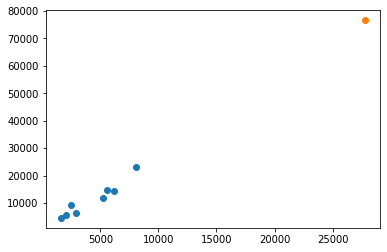

In [310]:
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(new_data_sum)
# retrieve unique clusters
clusters = unique(yhat)
X=np.array(new_data_sum)

for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Birch

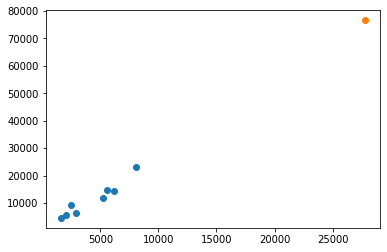

In [ ]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=2)
model.fit(new_data_sum)
yhat = model.predict(new_data_sum)
clusters = unique(yhat)
X=np.array(new_data_sum)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

# Mean Shift


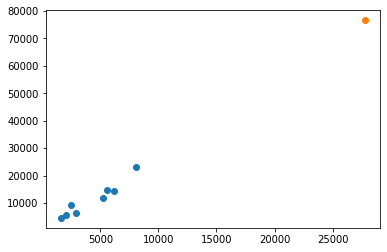

In [ ]:
from sklearn.cluster import MeanShift

model = MeanShift()
yhat = model.fit_predict(new_data_sum)
clusters = unique(yhat)
X=np.array(new_data_sum)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])


karaj & tehran \ tabriz & kermanshah

**Gaussian Mixture Model:**

**DBSCAN:**
This algorithm is not suitable for our data because the data is not compact

**OPTICS:**

# Q2:

In [314]:
import pandas as pd
import numpy as np
data_digi = pd.read_csv('/content/drive/MyDrive/orders.csv')


In [315]:
data_digi.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [316]:
len(data_digi['ID_Item'].unique())

95232

In [317]:
len(data_digi['ID_Item'])

200000

In [318]:
data_digi.isnull().sum()

ID_Order                 0
ID_Customer              0
ID_Item                  0
DateTime_CartFinalize    0
Amount_Gross_Order       0
city_name_fa             0
Quantity_item            0
dtype: int64

In [319]:
data_digiP = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/product.xlsx')


In [320]:
data_digiP.head(3)

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لو...,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":..."
1,727089,ست آبکش و آبگیر تیتیز مدل AP-9141 سایز متوسط,NaN,ست-آبکش-و-آبگیر-تیتیز-مدل-ap-9141-سایز-متوسط,";hsi, steel, کاسه، کاسه بامبو، لگن، کالا خانه ...",آبکش و آبگیر,آبکش و آبگیر VirgoBasin,تیتیز,Titiz,"[{""Key"":""دستگیره"",""Value"":""1 جفت""},{""Key"":""نوع..."
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 می...,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-می...,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره""..."


In [321]:
len(data_digiP['category_title_fa'].unique())

1206

In [322]:
data_digiP = data_digiP.rename(columns={'id': 'ID_Item'})
data_digiP.head(1)


,ID_Item,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لو...,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":..."


In [323]:
resultdig = pd.merge(data_digiP, data_digi, how="left", on="ID_Item")
resultdig.isnull().sum()


ID_Item                      0
product_title_fa             0
product_title_en         80777
url_code                    17
title_alt                23128
category_title_fa            0
category_keywords          260
brand_name_fa                0
brand_name_en                0
product_attributes       99385
ID_Order                 95582
ID_Customer              95582
DateTime_CartFinalize    95582
Amount_Gross_Order       95582
city_name_fa             95582
Quantity_item            95582
dtype: int64

In [324]:
resultdig=resultdig.dropna(subset=['Quantity_item'])
resultdig.notnull().sum()


ID_Item                  6900
product_title_fa         6900
product_title_en         1485
url_code                 6900
title_alt                5317
category_title_fa        6900
category_keywords        6889
brand_name_fa            6900
brand_name_en            6900
product_attributes        177
ID_Order                 6900
ID_Customer              6900
DateTime_CartFinalize    6900
Amount_Gross_Order       6900
city_name_fa             6900
Quantity_item            6900
dtype: int64

In [325]:
pmdgi = pd.get_dummies(resultdig['category_title_fa'])
pmdgi.drop('akhhvkhlnghdht3700ثغدشنساثدششقثدشئخیثمشب3700', inplace=True, axis=1)
pmdgi.head(1)

,USB هاب,dj,آبرنگ و گواش,آبمیوه گیری,آبکش و آبگیر,آبگرمکن,آشنایی با فنون,آفتابگیر خودرو,آموزش موسیقی,آموزش نرم‌افزار و کامپیوتر,آموزش، سرگرمی و اکسسوری حیوانات,آمپلی فایر,آویز تخت کودک,آویز ساعت,آویز ساعت طلا,آویز ساعت نقره,آویز و جاسوییچی,آویز گردنبند طلا (پلاک),آویز گردنبند نقره (پلاک),آچار,آکواریوم آبزیان,آینه,ابزار آشپزی,ابزار ایمنی کودک و نوزاد,ابزار بایگانی,ابزار حمام,ابزار شوخی,ابزار شیرینی پزی,ابزار مراقبت پا,ابزار مهمانی,ابزار نقاشی ساختمان,ابزارهای اندازه گیری دیجیتالی و لیزری,اتو,اتو و حالت دهنده ی مو,اجاق مایکروویو,اجاق و ظرف سفری,ادویه و چاشنی,ارگانایزر,استند تبلت,استیکر و تابلو کودک و نوزاد,...,کولر گازی,کیبورد (صفحه کلید),کیت آموزشی,کیت تمیز کننده,کیت رنگ مو,کیس های اسمبل شده,کیس و کاور,کیسه بوکس,کیسه نان و سبزی,کیف دست دوز پارچه ای,کیف دوربین,کیف و کاور تبلت,کیف و کاور لپ تاپ,کیف و کاور گوشی,کیف و کوله,کیف و کوله مدرسه,کیف و کوله پشتی,کیف پول,کیف چرمی,گاز صفحه ای,گبه,گردنبند,گردنبند طلا,گردنبند نقره,گرمکن مردانه,گریل و باربیکیو,گل سینه,گل و گلدان,گلدان,گلیم,گن مردانه,گهواره,گوشت کوب برقی,گوشواره,گوشواره طلا,گوشواره نقره,گیتار,گیرنده - فرستنده صدا,یادآور دارو,یخچال و فریزر
32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [326]:
# pmdgi.drop('akhhvkhlnghdht3700ثغدشنساثدششقثدشئخیثمشب3700', inplace=True, axis=1)
# print(new_data_sumdigi['USB هاب'].sum())
for column in pmdgi:
  if(int(pmdgi[column].sum())<5):
      pmdgi.drop(column, inplace=True, axis=1)
pmdgi

,آبکش و آبگیر,آشنایی با فنون,آفتابگیر خودرو,آویز تخت کودک,آویز ساعت,آویز و جاسوییچی,آویز گردنبند طلا (پلاک),آویز گردنبند نقره (پلاک),ابزار آشپزی,ابزار بایگانی,ابزار حمام,ابزار شیرینی پزی,ابزار مهمانی,اتو,اتو و حالت دهنده ی مو,اجاق و ظرف سفری,ارگانایزر,استیکر و تابلو کودک و نوزاد,استیکر و پوستر,اسپری,اسپری ضد تعریق,اسپیکر (بلندگو),اسکوتر برقی,انگشتر طلا,انگشتر نقره,اکسسوری عینک,اکسسوری مو,بازی,بازی آموزشی,بازی فکری,بالش شیردهی,بذر و تخم گیاهان,برس ها و تجهیزات آرایشی صورت,بسته های لوازم التحریر,بلوز و شومیز زنانه,بهداشت، مراقبت و نگهداری حیوانات,تابلو,تابلو شاسی,تابلو فرش,تابلو و ساعت,...,کرم مرطوب کننده و نرم کننده,کرم پودر,کفش بچگانه,کفش زنانه,کفش مردانه,کفش ورزشی بچه گانه,کفش ورزشی زنانه,کفش ورزشی مردانه,کفپوش خودرو,کلاه مردانه,کلاه و پیشبند نوزاد,کلاه کاسکت,کلاه، شال و دستکش,کلاژ، پوست و فرش رنگ شده,کلمن و فلاسک,کمد لباس و ارگانایزر,کمربند,کمک آموزشی,کوسن,کولر گازی,کیت رنگ مو,کیسه نان و سبزی,کیف دوربین,کیف و کاور تبلت,کیف و کاور لپ تاپ,کیف و کاور گوشی,کیف و کوله,کیف و کوله مدرسه,کیف و کوله پشتی,کیف پول,کیف چرمی,گبه,گردنبند,گردنبند نقره,گل سینه,گل و گلدان,گلیم,گوشواره,گوشواره طلا,گوشواره نقره
32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [327]:
# The number of cities is large
resultdig=resultdig[['city_name_fa']]
len(resultdig['city_name_fa'].unique()) 

372

In [328]:
new_datadigi = pd.concat([resultdig, pmdgi], axis = 1)
city_name=['اهواز','اصفهان', 'قم','تهران','کرج','کرمانشاه','مشهد','شیراز','تبریز']
new_datadigi=new_datadigi.loc[new_datadigi['city_name_fa'].isin(city_name)]
new_datadigi

,city_name_fa,آبکش و آبگیر,آشنایی با فنون,آفتابگیر خودرو,آویز تخت کودک,آویز ساعت,آویز و جاسوییچی,آویز گردنبند طلا (پلاک),آویز گردنبند نقره (پلاک),ابزار آشپزی,ابزار بایگانی,ابزار حمام,ابزار شیرینی پزی,ابزار مهمانی,اتو,اتو و حالت دهنده ی مو,اجاق و ظرف سفری,ارگانایزر,استیکر و تابلو کودک و نوزاد,استیکر و پوستر,اسپری,اسپری ضد تعریق,اسپیکر (بلندگو),اسکوتر برقی,انگشتر طلا,انگشتر نقره,اکسسوری عینک,اکسسوری مو,بازی,بازی آموزشی,بازی فکری,بالش شیردهی,بذر و تخم گیاهان,برس ها و تجهیزات آرایشی صورت,بسته های لوازم التحریر,بلوز و شومیز زنانه,بهداشت، مراقبت و نگهداری حیوانات,تابلو,تابلو شاسی,تابلو فرش,...,کرم مرطوب کننده و نرم کننده,کرم پودر,کفش بچگانه,کفش زنانه,کفش مردانه,کفش ورزشی بچه گانه,کفش ورزشی زنانه,کفش ورزشی مردانه,کفپوش خودرو,کلاه مردانه,کلاه و پیشبند نوزاد,کلاه کاسکت,کلاه، شال و دستکش,کلاژ، پوست و فرش رنگ شده,کلمن و فلاسک,کمد لباس و ارگانایزر,کمربند,کمک آموزشی,کوسن,کولر گازی,کیت رنگ مو,کیسه نان و سبزی,کیف دوربین,کیف و کاور تبلت,کیف و کاور لپ تاپ,کیف و کاور گوشی,کیف و کوله,کیف و کوله مدرسه,کیف و کوله پشتی,کیف پول,کیف چرمی,گبه,گردنبند,گردنبند نقره,گل سینه,گل و گلدان,گلیم,گوشواره,گوشواره طلا,گوشواره نقره
42,کرج,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
113,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131,کرج,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
134,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102433,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102436,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102445,شیراز,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102447,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [329]:
new_data_sumdigi = new_datadigi.groupby('city_name_fa').sum()
new_data_sumdigi

,آبکش و آبگیر,آشنایی با فنون,آفتابگیر خودرو,آویز تخت کودک,آویز ساعت,آویز و جاسوییچی,آویز گردنبند طلا (پلاک),آویز گردنبند نقره (پلاک),ابزار آشپزی,ابزار بایگانی,ابزار حمام,ابزار شیرینی پزی,ابزار مهمانی,اتو,اتو و حالت دهنده ی مو,اجاق و ظرف سفری,ارگانایزر,استیکر و تابلو کودک و نوزاد,استیکر و پوستر,اسپری,اسپری ضد تعریق,اسپیکر (بلندگو),اسکوتر برقی,انگشتر طلا,انگشتر نقره,اکسسوری عینک,اکسسوری مو,بازی,بازی آموزشی,بازی فکری,بالش شیردهی,بذر و تخم گیاهان,برس ها و تجهیزات آرایشی صورت,بسته های لوازم التحریر,بلوز و شومیز زنانه,بهداشت، مراقبت و نگهداری حیوانات,تابلو,تابلو شاسی,تابلو فرش,تابلو و ساعت,...,کرم مرطوب کننده و نرم کننده,کرم پودر,کفش بچگانه,کفش زنانه,کفش مردانه,کفش ورزشی بچه گانه,کفش ورزشی زنانه,کفش ورزشی مردانه,کفپوش خودرو,کلاه مردانه,کلاه و پیشبند نوزاد,کلاه کاسکت,کلاه، شال و دستکش,کلاژ، پوست و فرش رنگ شده,کلمن و فلاسک,کمد لباس و ارگانایزر,کمربند,کمک آموزشی,کوسن,کولر گازی,کیت رنگ مو,کیسه نان و سبزی,کیف دوربین,کیف و کاور تبلت,کیف و کاور لپ تاپ,کیف و کاور گوشی,کیف و کوله,کیف و کوله مدرسه,کیف و کوله پشتی,کیف پول,کیف چرمی,گبه,گردنبند,گردنبند نقره,گل سینه,گل و گلدان,گلیم,گوشواره,گوشواره طلا,گوشواره نقره
city_name_fa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
اصفهان,0,0,0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,2,3,0,1,1,0,2,1,0,0,1,0,0,0,1,2,0,0,5,4,2,1,...,0,0,0,2,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,4,0,0,0,1,8,0,1,2,4,0,0,4,2,0,0,0,1,1,0
اهواز,0,0,0,0,0,0,0,0,1,3,1,0,4,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,2,0,0,1,4,0,0,2,...,1,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,16,0,2,1,2,0,0,3,0,0,0,0,1,0,0
تبریز,1,0,0,0,0,0,0,0,0,1,1,2,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,2,0,3,...,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7,0,2,1,0,0,0,1,0,0,0,1,0,0,0
تهران,3,9,4,3,3,12,6,1,8,12,7,5,55,3,6,6,5,6,33,4,3,9,5,2,10,6,4,3,10,4,8,10,11,2,10,3,36,80,3,28,...,4,7,9,19,13,5,15,17,6,4,5,2,6,8,4,2,3,3,13,11,26,4,3,8,10,160,12,29,34,14,4,3,32,11,8,9,3,11,1,4
شیراز,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,3,3,0,1,...,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0,1,0,0,7,0,2,4,3,0,1,1,0,1,1,1,0,0,0
قم,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,2,2,0,3,...,0,1,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,2,0,0,0,0,0,1,0,0,0,0,0
مشهد,0,0,0,1,0,0,0,0,1,1,0,0,3,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,2,7,0,4,...,0,1,0,2,0,0,1,1,1,0,0,1,0,2,0,0,0,0,0,0,0,0,1,1,1,10,1,2,0,0,0,0,2,1,0,1,0,2,2,0
کرج,0,0,0,1,0,2,0,0,0,0,1,0,5,0,0,0,2,1,4,0,0,2,0,0,1,0,1,1,3,0,0,1,1,1,0,0,2,4,2,1,...,0,0,0,2,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,1,10,2,3,1,1,0,0,2,1,0,1,1,2,0,0
کرمانشاه,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,0,1,1,0,0,0,0,1,1,0,0,0,0,0


In [330]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema

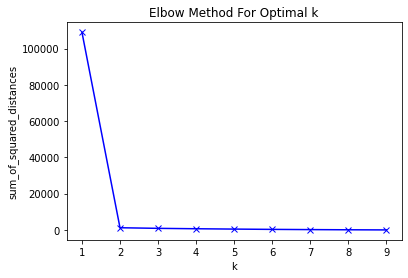

In [331]:
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=100, n_init=50)
    km = km.fit(new_data_sumdigi)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



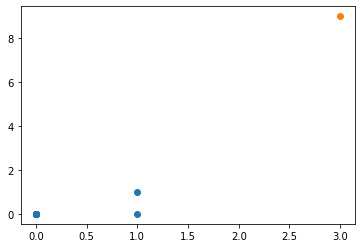

In [332]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.cluster import KMeans

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=50)
model.fit(new_data_sumdigi)
yhat = model.fit_predict(new_data_sumdigi)
clusters = unique(yhat)
X=np.array(new_data_sumdigi)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])


In [53]:
labels=model.labels_
new_data_sumdigi['clusterKM'] = labels
new_data_sumdigi[['clusterKM']]

,clusterKM
city_name_fa,
اصفهان,0
اهواز,0
تبریز,0
تهران,1
شیراز,0
قم,0
مشهد,0
کرج,0
کرمانشاه,0


In [337]:
from sklearn.cluster import AffinityPropagation
from numpy import unique
from numpy import where
from matplotlib import pyplot

model00 = AffinityPropagation(damping=0.7)
model00.fit(new_data_sumdigi)
yhat = model00.predict(new_data_sumdigi)
clusters = unique(yhat)
X=np.array(new_data_sumdigi)


In [335]:
labels=model00.labels_
new_data_sumdigi['clusterAP'] = labels
new_data_sumdigi[['clusterAP']]

,clusterAP
city_name_fa,
اصفهان,0
اهواز,0
تبریز,2
تهران,1
شیراز,2
قم,2
مشهد,3
کرج,4
کرمانشاه,2


# Q3:

**kmeans** : In both of datasets, all cities are in one cluster except Tehran, which is in another cluster.

**AffinityPropagation** : In both of datasets, Tehran is in one cluster

In [336]:
new_data_sum['clusterAffinityPropagation']

city
Ahvaz         2
Isfahan       0
Karaj         0
Kermanshah    2
Mashhad       1
Qom           2
Shiraz        0
Tabriz        2
Tehran        3
Name: clusterAffinityPropagation, dtype: int64

In [338]:
new_data_sumdigi[['clusterAP']]

,clusterAP
city_name_fa,
اصفهان,0
اهواز,0
تبریز,2
تهران,1
شیراز,2
قم,2
مشهد,3
کرج,4
کرمانشاه,2


# Q4:

In [1]:
import pandas as pd
import numpy as np
data_divar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/divar_posts_dataset.csv')
data_divar['price'].max()

400000000

In [2]:
data_divar = data_divar[data_divar.price != -1]
data_divar['price']

0          3850000
1            30000
3           600000
4           450000
5          1000000
            ...   
947630      180000
947631      350000
947632    17400000
947633       40000
947634       25000
Name: price, Length: 786203, dtype: int64

In [3]:
data_divar=data_divar.dropna(subset=['cat3','cat2'])


In [4]:
data_divar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650276 entries, 0 to 947634
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       650276 non-null  int64  
 1   archive_by_user  650276 non-null  bool   
 2   brand            167140 non-null  object 
 3   cat1             650276 non-null  object 
 4   cat2             650276 non-null  object 
 5   cat3             650276 non-null  object 
 6   city             650276 non-null  object 
 7   created_at       650276 non-null  object 
 8   desc             650276 non-null  object 
 9   id               650276 non-null  int64  
 10  image_count      650276 non-null  int64  
 11  mileage          103799 non-null  float64
 12  platform         650276 non-null  object 
 13  price            650276 non-null  int64  
 14  title            650276 non-null  object 
 15  type             77068 non-null   object 
 16  year             103799 non-null  obje

In [5]:
pricee=[]
for e in data_divar['price']:
  if e<10000:
    pricee.append(0)
  if e>=10000 and e<100000:
    pricee.append(1)
  if e>=100000 and e<1000000:
    pricee.append(2)
  if e>=1000000 and e<10000000:
    pricee.append(3)
  if e>=10000000 and e<100000000:  
    pricee.append(4)
  if e>=100000000 and e<200000000:
    pricee.append(5)
  if e>=200000000 and e<=400000000:
    pricee.append(6)

len(pricee)

650276

In [6]:
data_divar['price0']=pricee

In [7]:
divar_cluster = data_divar[['cat1','cat2','cat3']]


In [8]:
dum = pd.get_dummies(data_divar['price0'])
dum.head()


,0,1,2,3,4,5,6
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0


In [9]:
new_data_divar_price_cl = pd.concat([divar_cluster, dum], axis = 1)
new_data_divar_price_cl.head()

,cat1,cat2,cat3,0,1,2,3,4,5,6
0,for-the-home,furniture-and-home-decore,sofa-armchair,0,0,0,1,0,0,0
1,for-the-home,furniture-and-home-decore,antiques-and-art,0,1,0,0,0,0,0
3,for-the-home,furniture-and-home-decore,sofa-armchair,0,0,1,0,0,0,0
4,personal,baby-and-toys,personal-toys,0,0,1,0,0,0,0
5,for-the-home,furniture-and-home-decore,sofa-armchair,0,0,0,1,0,0,0


In [19]:
div_p=new_data_divar_price_cl.groupby(['cat3'], as_index=False).sum()
new_data_sum_divar_price_cl = new_data_divar_price_cl.groupby(['cat3']).sum()
new_data_sum_divar_price_cl

,0,1,2,3,4,5,6
cat3,,,,,,,
accessories,142.0,1908.0,2597.0,4.0,0.0,0.0,0.0
antiques-and-art,745.0,14770.0,9601.0,18.0,0.0,0.0,0.0
ball-sports,13.0,202.0,366.0,45.0,0.0,0.0,0.0
barbershop-and-beautysalon,69.0,309.0,1501.0,292.0,0.0,0.0,0.0
bathroom-wc-sauna,8.0,401.0,556.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
tv-projector,57.0,2008.0,9814.0,1945.0,0.0,0.0,0.0
video-dvdplayer,1.0,413.0,315.0,0.0,0.0,0.0,0.0
washer-dryer,31.0,138.0,3775.0,778.0,0.0,0.0,0.0


In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema

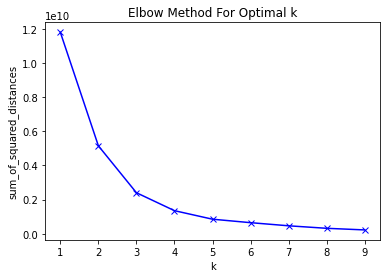

In [21]:
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=100, n_init=50)
    km = km.fit(new_data_sum_divar_price_cl)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



In [22]:
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from matplotlib import pyplot

model5 = KMeans(n_clusters=2)
model5.fit(new_data_sum_divar_price_cl)
yhat5 = model5.predict(new_data_sum_divar_price_cl)
print(yhat5)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
labels=model5.labels_
new_data_sum_divar_price_cl['cluster'] = labels
div_p['cluster']=labels
new_data_sum_divar_price_cl[:][32:36]

,0,1,2,3,4,5,6,cluster
cat3,,,,,,,,
laptops,15.0,6.0,1560.0,1958.0,0.0,0.0,0.0,0
light,144.0,492.0,123.0,20964.0,79566.0,2201.0,309.0,1
lighting,168.0,2012.0,4007.0,120.0,0.0,0.0,0.0,0
microwave-stove,21.0,651.0,4447.0,211.0,0.0,0.0,0.0,0


In [27]:
from sklearn.cluster import OPTICS,Birch,MeanShift,DBSCAN,OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering


model7 = MeanShift()
yhat = model7.fit_predict(new_data_sum_divar_price_cl)
yhat


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 5, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
labels7=model7.labels_
div_p['cluster']=labels7
div_p.head()

,cat3,0,1,2,3,4,5,6,cluster
0,accessories,142.0,1908.0,2597.0,4.0,0.0,0.0,0.0,0
1,antiques-and-art,745.0,14770.0,9601.0,18.0,0.0,0.0,0.0,1
2,ball-sports,13.0,202.0,366.0,45.0,0.0,0.0,0.0,0
3,barbershop-and-beautysalon,69.0,309.0,1501.0,292.0,0.0,0.0,0.0,0
4,bathroom-wc-sauna,8.0,401.0,556.0,0.0,0.0,0.0,0.0,0


# phase 4 :

In [117]:
 category='antiques-and-art'
 def definePrice():
   for index in div_p.index:
     if div_p['cat3'][index] == category :
       cluster0 = div_p['cluster'][index]
   c=[cluster0]
   div_p0=div_p.loc[div_p['cluster'].isin(c)]
   div_p01=div_p0[[0,1,2,3,4,5,6]]
   div_p02=div_p01.apply(lambda x: x.argmax(), axis=1)
   ssss=div_p02.value_counts()
   sh=ssss[ssss == ssss.max()]

   return sh.index[0]


print('price range : '+ format(definePrice()))


price range : 1
